In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from scipy.stats import pearsonr
from scipy import stats

from statsmodels.stats.outliers_influence import summary_table

from utils import *

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

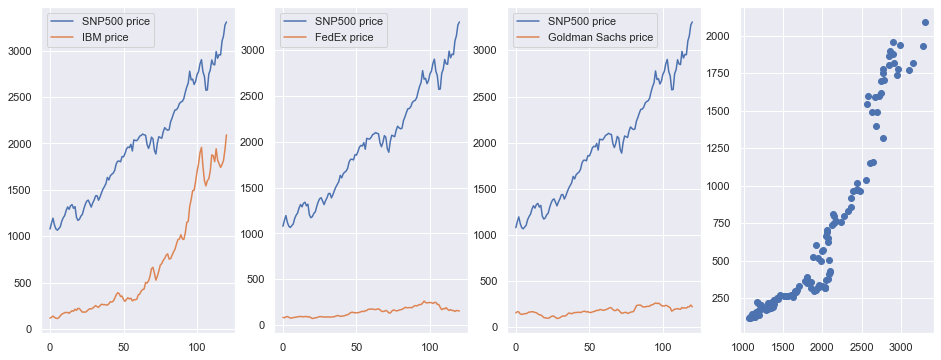

In [2]:
amzn_data = pd.read_csv('../Data/AMZN.csv',parse_dates =['Date'])
snp_data = pd.read_csv('../Data/GSPC.csv',parse_dates=['Date'])

#additional companies as x1,x2
fdx_data = pd.read_csv('../Data/FDX.csv',parse_dates=['Date'])
gs_data = pd.read_csv('../Data/GS.csv',parse_dates=['Date'])

snp_data['Price'] = (snp_data.High + snp_data.Low)*0.5
amzn_data['Price'] = (amzn_data.High + amzn_data.Low)*0.5
fdx_data['Price'] = (fdx_data.High + fdx_data.Low)*0.5
gs_data['Price'] = (gs_data.High + gs_data.Low)*0.5


#please never plot anything like that!
fig, ax = plt.subplots(1,4,figsize=(16,6))

snp_data['Price'].plot(label = 'SNP500 price',ax=ax[0])
amzn_data['Price'].plot(label = 'IBM price',ax=ax[0])
ax[0].legend()

snp_data['Price'].plot(label = 'SNP500 price',ax=ax[1])
fdx_data['Price'].plot(label = 'FedEx price',ax=ax[1])
ax[1].legend()

snp_data['Price'].plot(label = 'SNP500 price',ax=ax[2])
gs_data['Price'].plot(label = 'Goldman Sachs price',ax=ax[2])
ax[2].legend()

plt.scatter(snp_data['Price'],amzn_data['Price']);

x0,x1,x2,y = amzn_data.Price.values,fdx_data.Price.values,gs_data.Price.values, snp_data['Price'].values

$ y = b_0 + b_1x $

Завдання1: Перевірка на гетероскедастичність

З переліку галузей, представлених вище, опрацьовуємо запропоновану компанію.
* (A) Використовуючи комп'ютерне програмне забезпечення для виконання регресійних
розрахунків 𝑥 = 𝑟𝑚, 𝑦 = 𝑟𝑝 оцініть за допомогою регресії (1) параметри 𝑏0
і 𝑏1 для компанії.

model coefficients: 
	b0=1323.2274, b1=0.9417,
model characteristics: 
	r=0.9316,R^2=0.8680,F=782.2992


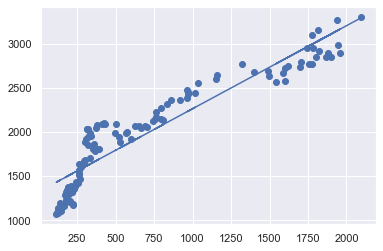

In [3]:
def f_statistic(y,y_pred):
    n=y.shape[0]
    R_2 = r2_score(y,y_pred)
    return (R_2*(n-2))/((1-R_2))


X = x0.reshape(-1,1)

lr = LinearRegression().fit(X,y)
y_hat = lr.predict(X)

b0,b1 = lr.intercept_,lr.coef_[0]
r,r_sq,f_val = pearsonr(y.reshape(-1),y_hat.reshape(-1))[0],r2_score(y,y_hat),f_statistic(y,y_hat)


plt.scatter(X,y)
plt.plot(X,y_hat);
print(f'model coefficients: \n\tb0={b0:.4f}, b1={b1:.4f},\nmodel characteristics: \n\tr={r:.4f},R^2={r_sq:.4f},F={f_val:.4f}')

* (B) Перевірити на гетероскедастичність за допомогою тесту Гольдфелда та Квондта;

In [4]:
import statsmodels.stats.api as sms
f_value,p_val = sms.het_goldfeldquandt(y,X)[0],sms.het_goldfeldquandt(y,X)[1]

f_critical = stats.f.ppf(q=1-0.025,dfn=1, dfd=X.shape[0]-2)
sign,msg = evaluate_hypothesis(f_value,f_critical)

print(f'F_value = {f_value:.4f} {sign} {f_critical:.4f} = F_crit. model is heteroscedastic with p_val={1-p_val}')

F_value = 11.6586 > 5.1534 = F_crit. model is heteroscedastic with p_val=1.0


* (C) Якщо підтвердиться гетероскадастичність трансформувати модель за допомогою
замін:
    * $\sigma^2_{\epsilon_i} = k^2x^2$
    * $ \sigma^2_{\epsilon_i} = k^2x$
* (D) Обрати кращу заміну і пояснити чому;

Множинна регресія:
$y = b_0+b_1x_1+b_2x_2+b_3x_3 $

Завдання 2: Перевірка на мультиколінеарність.
З переліку галузей, представлених вище, виберіть одну.
* (E) Використовуючи комп'ютерне програмне забезпечення для виконання регресійних
розрахунків 

𝑦 = 𝑟𝑚, 𝑥1 = 𝑟𝑝; 𝑥2 = 𝑟𝑝+1; 𝑥3 = 𝑟𝑝+2,де 

𝑝 + 1 та 𝑝 + 2 компанії яка є наступними після вашої у списку.

Оцініть за допомогою МНК регресію (2) та знайдіть коефіцієнти 𝑏0, 𝑏1, 𝑏2 для компанії.
* (F) Зробіть повний характеристичний аналіз для моделі;
Модель $R^2 |r |F $

In [5]:
X_data,y = np.concatenate([x0.reshape(-1,1),x1.reshape(-1,1),x2.reshape(-1,1)],axis=1), y.reshape(-1,1)

lr = LinearRegression().fit(X_data,y)
b1,b2,b3 = lr.coef_[0]
b0 = lr.intercept_[0]

y_hat = lr.predict(X_data)
r,r_sq,f_val = pearsonr(y.reshape(-1),y_hat.reshape(-1))[0],r2_score(y,y_hat),f_statistic(y,y_hat)
print(f'model coefficients: \n\tb0={b0:.4f}, b1={b1:.4f}, b2={b2:.4f} b3={b3:.4f}\nmodel characteristics: \n\tr={r:.4f},R^2={r_sq:.4f},F={f_val:.4f}')

model coefficients: 
	b0=707.8392, b1=0.6467, b2=2.5452 b3=2.5549
model characteristics: 
	r=0.9634,R^2=0.9281,F=1535.5362


* (G) Побудувати довірчий діапазон для регресійних значень 𝑦̂ (з рівнем довіри 95%);<br>
Альтернативно побудуємо прогноз за допомогою statsmodels

In [6]:
x = sm.add_constant(X_data)
model = sm.OLS(y,x).fit()
y_hat = model.predict(x)
model.summary()
b0,b1,b2,b3 = model.params
print(f'model coefficients: \n\tb0={b0:.4f}, b1={b1:.4f}, b2={b2:.4f} b3={b3:.4f}\nmodel characteristics: \n\tr={model.rsquared**0.5:.4f},R^2={model.rsquared:.4f},F={model.fvalue:.4f}')

model coefficients: 
	b0=707.8392, b1=0.6467, b2=2.5452 b3=2.5549
model characteristics: 
	r=0.9634,R^2=0.9281,F=503.2430


In [17]:
X_data[:,0]

array([ 119.3400005,  127.8600005,  140.9349975,  128.4799995,
        117.579998 ,  115.34     ,  124.189999 ,  143.9749985,
        161.6949995,  169.305    ,  179.369995 ,  179.25     ,
        180.4549945,  171.0800015,  186.584999 ,  198.635002 ,
        193.919998 ,  215.404999 ,  202.2750015,  224.2350005,
        221.610001 ,  201.9300005,  183.3150025,  185.       ,
        182.7850035,  193.215004 ,  208.744995 ,  220.040001 ,
        217.3600005,  226.675003 ,  239.330002 ,  254.3849945,
        242.409996 ,  235.4149935,  252.9299925,  268.989998 ,
        264.7049945,  264.7350005,  262.179993 ,  258.830002 ,
        273.145004 ,  295.3899995,  292.769989 ,  302.37001  ,
        332.449997 ,  367.9900055,  392.5650025,  382.910004 ,
        351.800003 ,  356.994995 ,  318.149994 ,  299.625    ,
        322.2799985,  338.3549955,  325.6300045,  333.51001  ,
        304.580002 ,  316.7750095,  316.835007 ,  322.375    ,
        369.6900025,  377.0350035,  410.494995 ,  426.7

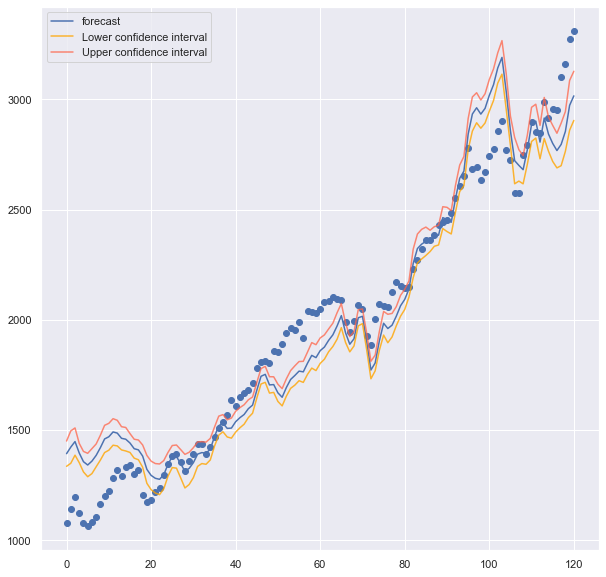

In [26]:
ci_lower, ci_upper = summary_table(model, alpha = 0.05)[1][:, 4:6].T

plt.figure(figsize=(10,10))

plt.plot(np.arange(121),y_hat,label='forecast')
plt.scatter(np.arange(121),y)

plt.plot(np.arange(121), ci_lower,alpha=0.8,color='orange',label='Lower confidence interval')
plt.plot(np.arange(121), ci_upper,alpha=0.75,c='tomato',label='Upper confidence interval')
# plt.fill_between(snp_test_data.Price,forecast_ci['low'],forecast_ci['high'],alpha=0.2)
plt.legend();

* (H) Перевірте на наявність мультиколінеарності;
* (I) Якщо мультиколінеарність підтверджується змініть модель;

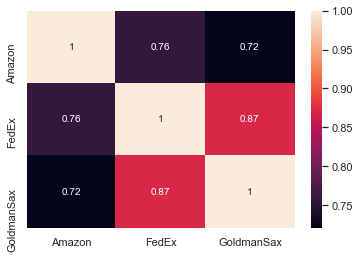

In [8]:
t = pd.DataFrame(X_data,columns=['Amazon','FedEx','GoldmanSax'])
sns.heatmap(t.corr(),annot=True);

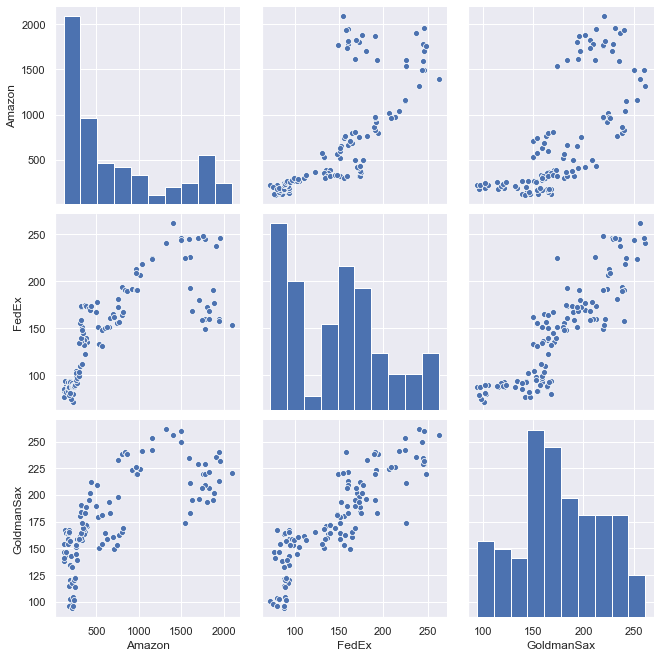

In [9]:
sns.pairplot(t,palette='tab20',height=3);

Перевірка на мультиколінеарність: [Variance inflation factor](https://en.wikipedia.org/wiki/Variance_inflation_factor)

In [10]:
cc = np.corrcoef(t, rowvar=False)
VIF = np.linalg.inv(cc)
VIF.diagonal()

array([2.4355358 , 4.92351239, 4.34704031])

In [11]:
print('Не можемо підтвердити сильну мультиколінеарність, не будемо змінювати модель' if VIF.max()<10 else 'Бачимо високу мультиколінеарність, маємо змінювати модель')

Не можемо підтвердити сильну мультиколінеарність, не будемо змінювати модель
